# A sinusoidal source and a square pulse source with the same frequencies and different initial phases


# Import necessary libraries

In [36]:
from scipy import signal
import numpy as np
import matplotlib.pyplot as plt
from scipy import spatial


# Define Function to plot scatterplot

In [37]:
def geometrical(a,s):
    x = np.matmul(a,s)
    x1 = x[0]
    x2 = x[1]
    x1 = np.asarray(x1).ravel()
    x2 = np.asarray(x2).ravel()
    plt.scatter(x1,x2)
    plt.ylabel('x2')
    plt.xlabel('x1')                                                                           
    plt.show()   
    return 0


# Define separation function

In [38]:

def sepration(a,b):
    A1 = np.array([[1,a],[b,1]])
    A1_inv = np.linalg.inv(A1)
    S = np.matmul(A1_inv,x)
    return S
    

# Define MSE


In [39]:

def mse(actual, predicted):
    actual = np.array(actual)
    predicted = np.array(predicted)
    differences = np.subtract(actual, predicted)
    squared_differences = np.square(differences)
    return squared_differences.mean()

# Define Function to plot output

In [40]:

def output_geometrical(s):
    s1 = s[0]
    s2 = s[1]
    s1 = np.asarray(s1).ravel()
    s2 = np.asarray(s2).ravel()
    plt.scatter(s1,s2)
    plt.ylabel('s2')
    plt.xlabel('s1')                                                                           
    plt.show()   
    return 0


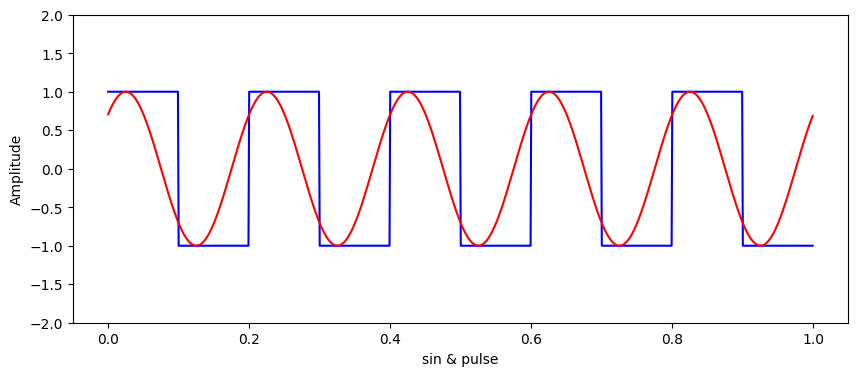

In [41]:


t = np.linspace(0, 1, 1000, endpoint=False)
pulse = signal.square(10 * np.pi * t)
sin = np.sin(10 * np.pi * t + np.pi/4 )


plt.figure(figsize = (10,4))
plt.plot(t,pulse, 'b')
plt.plot(t,sin, 'r')
plt.ylabel('Amplitude')
plt.xlabel('sin & pulse')
plt.ylim(-2,2)
plt.show()


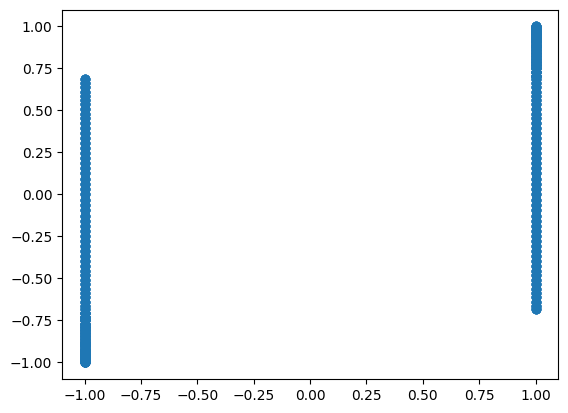

In [42]:

plt.scatter(pulse , sin)
plt.show()

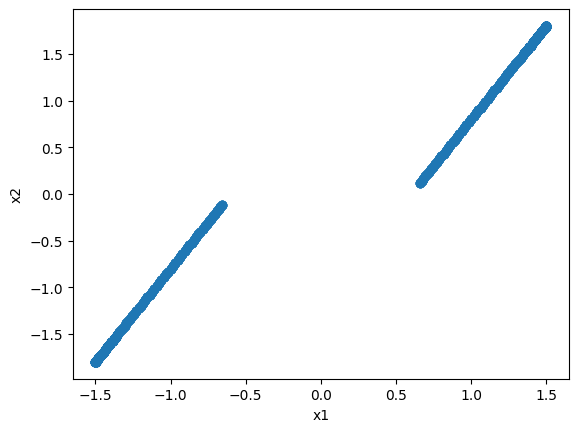

0

In [43]:
a1 = np.array([[1,0.5],[0.8,1]])
s = np.asmatrix([pulse , sin])
X = np.matmul(a1,s)
geometrical(a1,s)

In [44]:
import numpy as np
X = np.vstack([pulse, sin])


# Define the lacume function
def lacume(X, a, b):
    # Calculating of Lacume
    # X: Mixing Matrix
    B = np.array([[1, a], [b, 1]])
    Y = np.matmul(B,X)
    y1 = Y[0,:]
    y2 = Y[1,:]
    # Calculating of comulant
    Cum13 = np.mean(y1*(y2**3)) - 3*np.mean(y1*y2)*np.mean(y2**2)
    Cum31 = np.mean(y2*(y1**3)) - 3*np.mean(y1*y2)*np.mean(y1**2)
    Cum22 = np.mean((y1**2)*(y2**2)) - np.mean(y1**2)*np.mean(y2**2) - 2*np.mean(y1*y2)*np.mean(y1*y2)
    J = -1/np.sqrt(Cum13**2 + Cum31**2 + Cum22**2)
    return J

np.random.seed(12)

a = [np.random.rand()]
b = [np.random.rand()]

# Run the algorithm for 1000 iterations
for k in range(1000):
    delta = 0.00002
    a_deriv = (lacume(X, a[k] + delta, b[k]) - lacume(X, a[k], b[k])) / delta
    a.append(a[k] - 0.001 * a_deriv)
    b_deriv = (lacume(X, a[k], b[k] + delta) - lacume(X, a[k], b[k])) / delta
    b.append(b[k] - 0.001 * b_deriv)

    # Estimate source signals
    B = np.array([[1, a[k+1]], [b[k+1], 1]])
    Y = np.matmul(B,X)
    y1 = Y[0,:]
    y2 = Y[1,:]


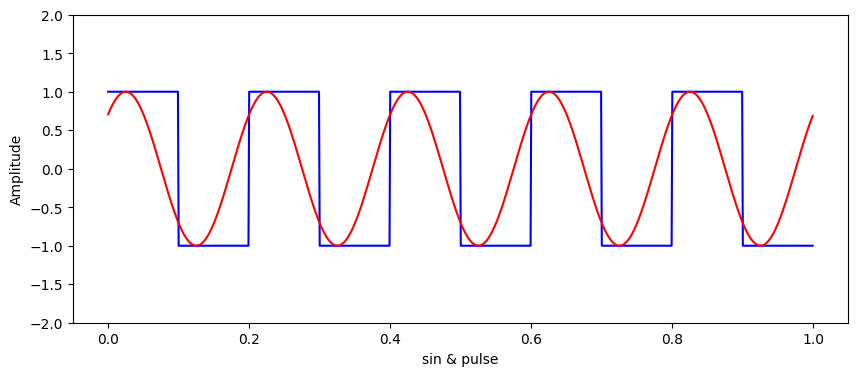

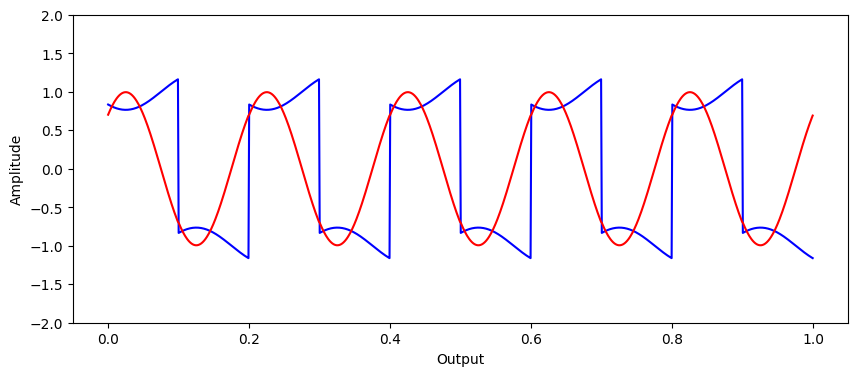

In [45]:
plt.figure(figsize = (10,4))
plt.plot(t,pulse, 'b')
plt.plot(t,sin, 'r')
plt.ylabel('Amplitude')
plt.xlabel('sin & pulse')
plt.ylim(-2,2)
plt.show()


###############################

Pulsee = Y[0] 
Sinn = Y[1]

plt.figure(figsize = (10,4))
plt.plot(t,Pulsee, 'b')
plt.plot(t,Sinn, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Output')
plt.ylim(-2,2)
plt.show()






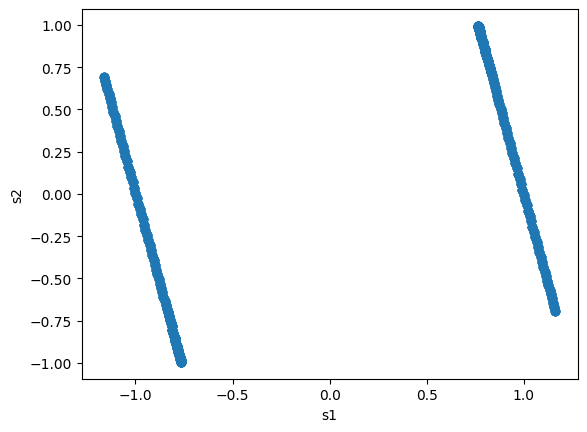

0

In [46]:
output_geometrical(Y)

In [47]:
import numpy as np

def lacume(X, a, b):
    # Calculate Lacume and comulant
    B = np.array([[1, a], [b, 1]])
    Y = np.matmul(B, X)
    y1, y2 = Y[0,:], Y[1,:]
    Cum13 = np.mean(y1*(y2**3)) - 3*np.mean(y1*y2)*np.mean(y2**2)
    Cum31 = np.mean(y2*(y1**3)) - 3*np.mean(y1*y2)*np.mean(y1**2)
    Cum22 = np.mean((y1**2)*(y2**2)) - np.mean(y1**2)*np.mean(y2**2) - 2*np.mean(y1*y2)*np.mean(y1*y2)
    J = -1/np.sqrt(Cum13**2 + Cum31**2 + Cum22**2)

    # Calculate gradients
    mu_1, mu_2 = np.mean(y1), np.mean(y2)
    mu_11, mu_12, mu_21, mu_22 = np.mean(y1**2), np.mean(y1*y2), np.mean(y1*y2), np.mean(y2**2)
    mu_31, mu_32 = np.mean(y1**3), np.mean(y2**3)
    mu_13, mu_23 = np.mean(y1*(y2**3)), np.mean(y2*(y1**3))
    grad_a = (3*(mu_1**2 - mu_11)*mu_21 - 2*mu_1*mu_11*mu_31 + (mu_11**2 - mu_2) * mu_13) / (2*(mu_22*mu_11 - mu_21*mu_12)**(3/2))
    grad_b = (3*(mu_2**2 - mu_22)*mu_12 - 2*mu_2*mu_22*mu_32 + (mu_22**2 - mu_1*mu_21)) * mu_23 / (2*(mu_11*mu_22 - mu_12*mu_21)**(3/2))

    return J, grad_a, grad_b

def gradient_descent(X, a_init, b_init, learning_rate, threshold):
    # Initialize
    a, b = a_init, b_init
    cost = float('inf')
    iteration = 0
    
    while cost > threshold:
        # Calculate cost and gradients
        J, grad_a, grad_b = lacume(X, a, b)
        cost = abs(J)

        # Print status
        print(f"Iteration: {iteration}, Cost: {cost:.4f}, a: {a:.4f}, b: {b:.4f}")

        # Update parameters
        a -= learning_rate * grad_a
        b -= learning_rate * grad_b
        iteration += 1

    return a, b


In [48]:
a_init, b_init = 0.0, 0.0
learning_rate = 0.004
threshold = 0.001

a_star, b_star = gradient_descent(X, a_init, b_init, learning_rate, threshold)

Iteration: 0, Cost: 0.9512, a: 0.0000, b: 0.0000
Iteration: 1, Cost: 0.9285, a: 0.0127, b: 0.0025
Iteration: 2, Cost: 0.9054, a: 0.0256, b: 0.0053
Iteration: 3, Cost: 0.8821, a: 0.0389, b: 0.0083
Iteration: 4, Cost: 0.8585, a: 0.0526, b: 0.0115
Iteration: 5, Cost: 0.8345, a: 0.0667, b: 0.0150
Iteration: 6, Cost: 0.8102, a: 0.0811, b: 0.0188
Iteration: 7, Cost: 0.7856, a: 0.0960, b: 0.0230
Iteration: 8, Cost: 0.7607, a: 0.1113, b: 0.0275
Iteration: 9, Cost: 0.7354, a: 0.1271, b: 0.0325
Iteration: 10, Cost: 0.7097, a: 0.1434, b: 0.0380
Iteration: 11, Cost: 0.6837, a: 0.1603, b: 0.0441
Iteration: 12, Cost: 0.6572, a: 0.1777, b: 0.0508
Iteration: 13, Cost: 0.6303, a: 0.1958, b: 0.0582
Iteration: 14, Cost: 0.6030, a: 0.2145, b: 0.0666
Iteration: 15, Cost: 0.5751, a: 0.2340, b: 0.0759
Iteration: 16, Cost: 0.5467, a: 0.2543, b: 0.0866
Iteration: 17, Cost: 0.5176, a: 0.2755, b: 0.0987
Iteration: 18, Cost: 0.4878, a: 0.2977, b: 0.1127
Iteration: 19, Cost: 0.4572, a: 0.3209, b: 0.1291
Iteration:

# Plotting output

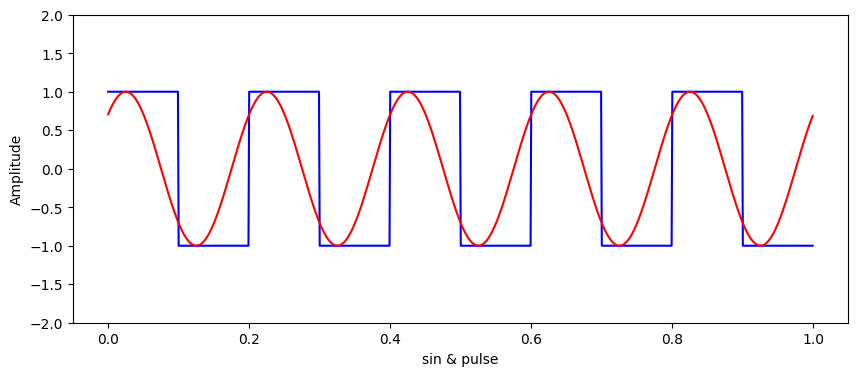

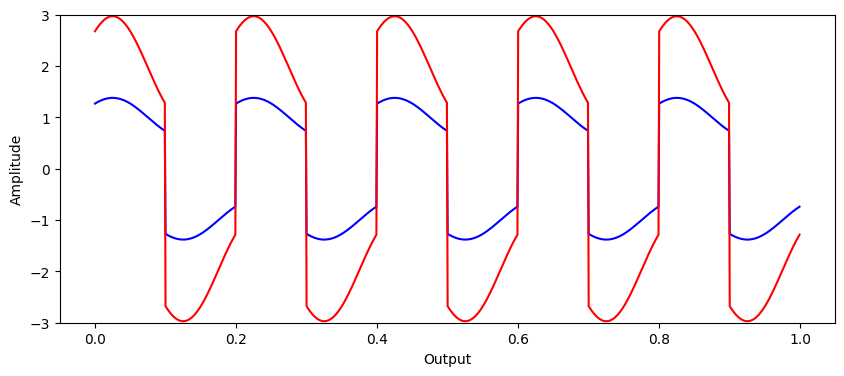

In [49]:
B = np.array([[1, 0.3804], [1.9705, 1]])
Y = np.matmul(B, X)

plt.figure(figsize = (10,4))
plt.plot(t,pulse, 'b')
plt.plot(t,sin, 'r')
plt.ylabel('Amplitude')
plt.xlabel('sin & pulse')
plt.ylim(-2,2)
plt.show()


Pulsee = Y[0] 
Sinn = Y[1]

plt.figure(figsize = (10,4))
plt.plot(t,Pulsee, 'b')
plt.plot(t,Sinn, 'r')
plt.ylabel('Amplitude')
plt.xlabel('Output')
plt.ylim(-3,3)
plt.show()


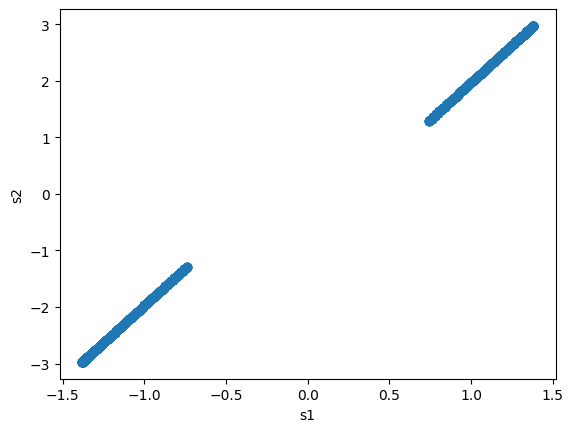

0

In [50]:
output_geometrical(Y)